Falta:
- Acabar preproceso de las columnas

In [933]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from pandas import plotting
import numpy as np

# Read data

In [934]:
data = pd.read_csv('../datasets/original/train.csv', sep=',', na_values="NA")
#test_data = pd.read_csv('../datasets/original/test.csv', sep=',', na_values="NA")
#data = pd.concat([train_data, test_data],sort=False)

In [935]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [936]:
data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 81 entries, Id to SalePrice
dtypes: float64(3), int64(35), object(43)
memory usage: 924.0+ KB


In [937]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Features preprocessing

In [938]:
data[data.columns[data.isna().any()]].isna().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

## MSSubClass

Identifies the type of dwelling involved in the sale.<br>
<br>
        20->1-STORY 1946 & NEWER ALL STYLES<br>
        30->1-STORY 1945 & OLDER<br>
        40->1-STORY W/FINISHED ATTIC ALL AGES<br>
        45->1-1/2 STORY - UNFINISHED ALL AGES<br>
        50->1-1/2 STORY FINISHED ALL AGES<br>
        60->2-STORY 1946 & NEWER<br>
        70->2-STORY 1945 & OLDER<br>
        75->2-1/2 STORY ALL AGES<br>
        80->SPLIT OR MULTI-LEVEL<br>
        85->SPLIT FOYER<br>
        90->DUPLEX - ALL STYLES AND AGES<br>
       120->1-STORY PUD (Planned Unit Development) - 1946 & NEWER<br>
       150->1-1/2 STORY PUD - ALL AGES<br>
       160->2-STORY PUD - 1946 & NEWER<br>
       180->PUD - MULTILEVEL - INCL SPLIT LEV/FOYER<br>
       190->2 FAMILY CONVERSION - ALL STYLES AND AGES<br>
<br>

Type: Categorical

Check nulls

In [939]:
data['MSSubClass'].isna().sum()

0

In [940]:
data['MSSubClass'].describe()

count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64

We change it to categorical

In [941]:
data.loc[data.MSSubClass == 20, 'MSSubClass'] = 'A'
data.loc[data.MSSubClass == 30, 'MSSubClass'] = 'B'
data.loc[data.MSSubClass == 40, 'MSSubClass'] = 'C'
data.loc[data.MSSubClass == 45, 'MSSubClass'] = 'D'
data.loc[data.MSSubClass == 50, 'MSSubClass'] = 'E'
data.loc[data.MSSubClass == 60, 'MSSubClass'] = 'F'
data.loc[data.MSSubClass == 70, 'MSSubClass'] = 'G'
data.loc[data.MSSubClass == 75, 'MSSubClass'] = 'H'
data.loc[data.MSSubClass == 80, 'MSSubClass'] = 'I'
data.loc[data.MSSubClass == 85, 'MSSubClass'] = 'J'
data.loc[data.MSSubClass == 90, 'MSSubClass'] = 'K'
data.loc[data.MSSubClass == 120, 'MSSubClass'] = 'L'
data.loc[data.MSSubClass == 150, 'MSSubClass'] = 'M'
data.loc[data.MSSubClass == 160, 'MSSubClass'] = 'N'
data.loc[data.MSSubClass == 180, 'MSSubClass'] = 'O'
data.loc[data.MSSubClass == 190, 'MSSubClass'] = 'P'

In [942]:
data['MSSubClass'].value_counts()

A    536
F    299
E    144
L     87
B     69
N     63
G     60
I     58
K     52
P     30
J     20
H     16
D     12
O     10
C      4
Name: MSSubClass, dtype: int64

## MSZoning

Identifies the general zoning classification of the sale.<br>
<br>	
       A->Agriculture<br>
       C->Commercial<br>
       FV->Floating Village Residential<br>
       I->Industrial
       RH->Residential High Density<br>
       RL->Residential Low Density<br>
       RP->Residential Low Density Park<br> 
       RM->Residential Medium Density<br>
<br>	
Type: Categorical

Check nulls

In [943]:
data['MSZoning'].isna().sum()

0

There is a very low number of nulls so we substitue them by the median.

In [944]:
data['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [945]:
median = 'RL'
data.loc[data.MSZoning.isna(), 'MSZoning'] = median
data['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

## LotFrontage

Linear feet of street connected to property. <br>

Type: Numeric

Check nulls

In [946]:
data['LotFrontage'].isna().sum()

259

There are too many nulls so we delete the column.

In [947]:
data.drop(columns=['LotFrontage'],inplace=True)

## LotArea

Lot size in square feet. <br>
Type: Numeric

Check nulls

In [948]:
data['LotArea'].isna().sum()

0

Check outliers

In [949]:
outliers = data[data.LotArea>data.LotArea.mean()+2*data.LotArea.std()]
len(outliers)

22

If they cause problems in the 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D8F5D1D30>]],
      dtype=object)

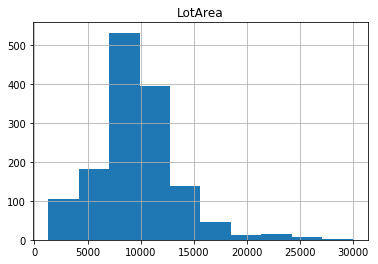

In [950]:
data = data[data['LotArea'] < data.LotArea.mean()+2*data.LotArea.std()]
data.hist(column=['LotArea'])

## Street

Type of road access to property. <br>
<br>
       Grvl->Gravel	<br>
       Pave->Paved<br>
<br>
Type: Binary

Check nulls

In [951]:
data['Street'].isna().sum()

0

Check distribution

In [952]:
data['Street'].value_counts()

Pave    1434
Grvl       4
Name: Street, dtype: int64

The majority of observations have the same value, maybe we delete this column in the future

## Alley

Type of alley access to property. <br>
<br>
       Grvl->Gravel<br>
       Pave->Paved<br>
       NA->No alley access<br>
<br>
Type: Binary

Check nulls

In [953]:
data['Alley'].isna().sum()

1347

There are too many nulls so we delete the column.

In [954]:
data.drop(columns=['Alley'],inplace=True)

## LotShape

General shape of property. <br>
<br>
       Reg->Regular<br>	
       IR1->Slightly irregular<br>
       IR2->Moderately Irregular<br>
       IR3->Irregular<br>
<br>
Type: Categorical

Check nulls

In [955]:
data['LotShape'].isna().sum()

0

Check distribution

In [956]:
data['LotShape'].value_counts()

Reg    922
IR1    473
IR2     35
IR3      8
Name: LotShape, dtype: int64

We make a binary variable that tells if the property is regular or not.

In [957]:
data['LotShape'] = data.apply(lambda row: row['LotShape'] == 'Reg', axis=1)
data['LotShape'].value_counts()

True     922
False    516
Name: LotShape, dtype: int64

## LandContour

Flatness of the property. <br>
<br>
       Lvl->Near Flat/Level	<br>
       Bnk->Banked - Quick and significant rise from street grade to building<br>
       HLS->Hillside - Significant slope from side to side<br>
       Low->Depression<br>
<br>		
Type: Categorical

Check nulls

In [958]:
data['LandContour'].isna().sum()

0

Check distribution

In [959]:
data['LandContour'].value_counts()

Lvl    1306
Bnk      58
HLS      48
Low      26
Name: LandContour, dtype: int64

## Utilities

Type of utilities available. <br>
<br>
       AllPub->All public Utilities (E,G,W,& S)<br>	
       NoSewr->Electricity, Gas, and Water (Septic Tank)<br>
       NoSeWa->Electricity and Gas Only<br>
       ELO->Electricity only	<br>
 <br>      
Type: Categorical

Check nulls

In [960]:
data['Utilities'].isna().sum()

0

Check distribution

In [961]:
data['Utilities'].value_counts()

AllPub    1437
NoSeWa       1
Name: Utilities, dtype: int64

This column gives not information at all, so we delete it

In [962]:
data.drop(columns=['Utilities'],inplace=True)

## LotConfig

Lot configuration. <br>
<br>
       Inside->Inside lot<br>
       Corner->Corner lot<br>
       CulDSac->Cul-de-sac<br>
       FR2->Frontage on 2 sides of property<br>
       FR3->Frontage on 3 sides of property<br>
<br>      
Type: Categorical

Check nulls

In [963]:
data['LotConfig'].isna().sum()

0

Check distribution

In [964]:
data['LotConfig'].value_counts()

Inside     1042
Corner      259
CulDSac      86
FR2          47
FR3           4
Name: LotConfig, dtype: int64

We merge the two types of frontage

In [965]:
data.loc[data.LotConfig == 'FR2', 'LotConfig'] = 'FR'
data.loc[data.LotConfig == 'FR3', 'LotConfig'] = 'FR'
data['LotConfig'].value_counts()

Inside     1042
Corner      259
CulDSac      86
FR           51
Name: LotConfig, dtype: int64

## LandSlope

Slope of property. <br>
<br>
       Gtl->Gentle slope<br>
       Mod->Moderate Slope	<br>
       Sev->Severe Slope<br>
<br>
Type: Categorical

Check nulls

In [966]:
data['LandSlope'].isna().sum()

0

Check distribution

In [967]:
data['LandSlope'].value_counts()

Gtl    1373
Mod      58
Sev       7
Name: LandSlope, dtype: int64

## Neighborhood

Physical locations within Ames city limits. <br>
<br>
       Blmngtn->Bloomington Heights<br>
       Blueste->Bluestem<br>
       BrDale->Briardale<br>
       BrkSide->Brookside<br>
       ClearCr->Clear Creek<br>
       CollgCr->College Creek<br>
       Crawfor->Crawford<br>
       Edwards->Edwards<br>
       Gilbert->Gilbert<br>
       IDOTRR->Iowa DOT and Rail Road<br>
       MeadowV->Meadow Village<br>
       Mitchel->Mitchell<br>
       Names->North Ames<br>
       NoRidge->Northridge<br>
       NPkVill->Northpark Villa<br>
       NridgHt->Northridge Heights<br>
       NWAmes->Northwest Ames<br>
       OldTown->Old Town<br>
       SWISU->South & West of Iowa State University<br>
       Sawyer->Sawyer<br>
       SawyerW->Sawyer West<br>
       Somerst->Somerset<br>
       StoneBr->Stone Brook<br>
       Timber->Timberland<br>
       Veenker->Veenker<br>
<br>       
Type: Categorical

Check nulls

In [968]:
data['Neighborhood'].isna().sum()

0

Check distribution

In [969]:
data['Neighborhood'].value_counts()

NAmes      224
CollgCr    150
OldTown    113
Edwards     98
Somerst     86
Gilbert     78
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     50
Mitchel     48
NoRidge     39
IDOTRR      37
Timber      34
SWISU       25
StoneBr     24
ClearCr     20
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     10
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

## Condition1

Proximity to various conditions. <br>
<br>
       Artery->Adjacent to arterial street<br>
       Feedr->Adjacent to feeder street<br>	
       Norm->Normal	<br>
       RRNn->Within 200' of North-South Railroad<br>
       RRAn->Adjacent to North-South Railroad<br>
       PosN->Near positive off-site feature--park, greenbelt, etc.<br>
       PosA->Adjacent to postive off-site feature<br>
       RRNe->Within 200' of East-West Railroad<br>
       RRAe->Adjacent to East-West Railroad<br>
<br>       
Type: Categorical

Check nulls

In [970]:
data['Condition1'].isna().sum()

0

Check distribution

In [971]:
data['Condition1'].value_counts()

Norm      1241
Feedr       79
Artery      48
RRAn        26
PosN        18
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

We merge the ones that are related

In [972]:
data.loc[data.Condition1 == 'RRNn', 'Condition1'] = 'RRn'
data.loc[data.Condition1 == 'RRAn', 'Condition1'] = 'RRn'
data.loc[data.Condition1 == 'RRNe', 'Condition1'] = 'RRe'
data.loc[data.Condition1 == 'RRAe', 'Condition1'] = 'RRe'
data.loc[data.Condition1 == 'PosN', 'Condition1'] = 'Pos'
data.loc[data.Condition1 == 'PosA', 'Condition1'] = 'Pos'
data['Condition1'].value_counts()

Norm      1241
Feedr       79
Artery      48
RRn         31
Pos         26
RRe         13
Name: Condition1, dtype: int64

## Condition2

Proximity to various conditions (if more than one is present). <br>
<br>
       Artery->Adjacent to arterial street<br>
       Feedr->Adjacent to feeder street	<br>
       Norm->Normal	<br>
       RRNn->Within 200' of North-South Railroad<br>
       RRAn->Adjacent to North-South Railroad<br>
       PosN->Near positive off-site feature--park, greenbelt, etc.<br>
       PosA->Adjacent to postive off-site feature<br>
       RRNe->Within 200' of East-West Railroad<br>
       RRAe->Adjacent to East-West Railroad<br>
       <br>
Type: Categorical

Check nulls

In [973]:
data['Condition2'].isna().sum()

0

Check distribution

In [974]:
data['Condition2'].value_counts()

Norm      1424
Feedr        6
Artery       2
RRNn         2
PosN         1
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64

We delete this column because it gives not enought information.

In [975]:
data.drop(columns=['Condition2'],inplace=True)

## BldgType

Type of dwelling. <br>
<br>
       1Fam->Single-family Detached	<br>
       2FmCon->Two-family Conversion; originally built as one-family dwelling<br>
       Duplx->Duplex<br>
       TwnhsE->Townhouse End Unit<br>
       TwnhsI->Townhouse Inside Unit<br>
	<br>
Type: Categorical

Check nulls

In [976]:
data['BldgType'].isna().sum()

0

Check distribution

In [977]:
data['BldgType'].value_counts()

1Fam      1201
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      28
Name: BldgType, dtype: int64

We merge the ones that are related

In [978]:
data.loc[data.BldgType == 'TwnhsE', 'BldgType'] = 'Twnhs'
data['BldgType'].value_counts()

1Fam      1201
Twnhs      157
Duplex      52
2fmCon      28
Name: BldgType, dtype: int64

## HouseStyle

Style of dwelling. <br>
<br>
       1Story->One story<br>
       1.5Fin->One and one-half story: 2nd level finished<br>
       1.5Unf->One and one-half story: 2nd level unfinished<br>
       2Story->Two story<br>
       2.5Fin->Two and one-half story: 2nd level finished<br>
       2.5Unf->Two and one-half story: 2nd level unfinished<br>
       SFoyer->Split Foyer<br>
       SLvl->Split Level<br>
<br>       
Type: Categorical

Check nulls

In [979]:
data['HouseStyle'].isna().sum()

0

Check distribution

In [980]:
data['HouseStyle'].value_counts()

1Story    713
2Story    439
1.5Fin    151
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

## OverallQual

Rates the overall material and finish of the house. <br>
<br>
       10->Very Excellent<br>
       9->Excellent<br>
       8->Very Good<br>
       7->Good<br>
       6->Above Average<br>
       5->Average<br>
       4->Below Average<br>
       3->Fair<br>
       2->Poor<br>
       1->Very Poor<br>
<br>       
Type: Numeric

Check nulls

In [981]:
data['OverallQual'].isna().sum()

0

Check distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D8F48B400>]],
      dtype=object)

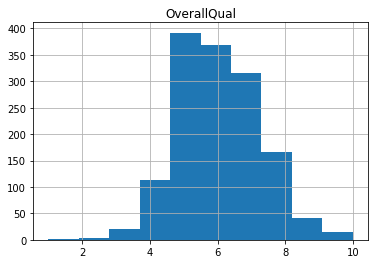

In [982]:
data.hist(column=['OverallQual'])

## OverallCond

Rates the overall condition of the house. <br>
<br>
       10->Very Excellent<br>
       9->Excellent<br>
       8->Very Good<br>
       7->Good<br>
       6->Above Average<br>	
       5->Average<br>
       4->Below Average<br>	
       3->Fair<br>
       2->Poor<br>
       1->Very Poor<br>
<br>
Type: Numeric

Check nulls

In [983]:
data['OverallCond'].isna().sum()

0

Check distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D8F5DD3C8>]],
      dtype=object)

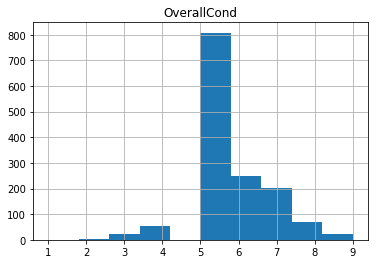

In [984]:
data.hist(column=['OverallCond'])

## YearBuilt

Original construction date. <br>
Type: Date

Check nulls

In [985]:
data['YearBuilt'].isna().sum()

0

Check distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D8F5D1278>]],
      dtype=object)

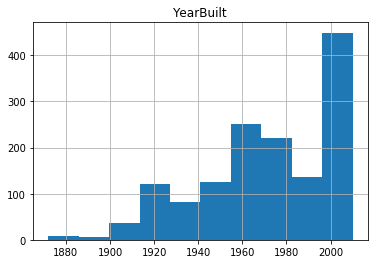

In [986]:
data.hist(column=['YearBuilt'])

## YearRemodAdd

Remodel date (same as construction date if no remodeling or additions). <br>
Type: Date

Check nulls

In [987]:
data['YearRemodAdd'].isna().sum()

0

Check differences with the previous column

In [988]:
len(data[(data['YearBuilt'] == data['YearRemodAdd'])])

754

We create a new column that tells if the house has been remodeled.

In [989]:
data['Remod'] = data.apply(lambda row: row['YearBuilt'] != row['YearRemodAdd'], axis=1)
data['Remod'].value_counts()

False    754
True     684
Name: Remod, dtype: int64

## RoofStyle

Type of roof. <br>
<br>
       Flat->Flat<br>
       Gable->Gable<br>
       Gambrel->Gabrel (Barn)<br>
       Hip->Hip<br>
       Mansard->Mansard<br>
       Shed->Shed<br>
       <br>
Type: Categorical

Check nulls

In [990]:
data['RoofStyle'].isna().sum()

0

Check distribution

In [991]:
data['RoofStyle'].value_counts()

Gable      1131
Hip         276
Gambrel      11
Flat         11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

## RoofMatl

Roof material. <br>
<br>
       ClyTile->Clay or Tile<br>
       CompShg->Standard (Composite) Shingle<br>
       Membran->Membrane<br>
       Metal->Metal<br>
       Roll->Roll<br>
       Tar&Grv->Gravel & Tar<br>
       WdShake->Wood Shakes<br>
       WdShngl->Wood Shingles<br>
<br>       
Type: Categorical

Check nulls

In [992]:
data['RoofMatl'].isna().sum()

0

In [993]:
data['RoofMatl'].value_counts()

CompShg    1417
Tar&Grv      10
WdShake       5
WdShngl       4
Metal         1
Roll          1
Name: RoofMatl, dtype: int64

The majority of observations have the same value, maybe we delete this column in the future.

## Exterior1st

Exterior covering on house. <br>
<br>
       AsbShng->Asbestos Shingles<br>
       AsphShn->Asphalt Shingles<br>
       BrkComm->Brick Common<br>
       BrkFace->Brick Face<br>
       CBlock->Cinder Block<br>
       CemntBd->Cement Board<br>
       HdBoard->Hard Board<br>
       ImStucc->Imitation Stucco<br>
       MetalSd->Metal Siding<br>
       Other->Other<br>
       Plywood->Plywood<br>
       PreCast->PreCast	<br>
       Stone->Stone<br>
       Stucco->Stucco<br>
       VinylSd->Vinyl Siding<br>
       Wd Sdng->Wood Siding<br>
       WdShing->Wood Shingles<br>
<br>       
Type: Categorical

In [994]:
data['Exterior1st'].isna().sum()

0

As there is only 1 NA, we will susbtitute this value with the mode.

In [995]:
data['Exterior1st'].value_counts()

VinylSd    514
HdBoard    220
MetalSd    218
Wd Sdng    200
Plywood    103
CemntBd     59
BrkFace     48
WdShing     25
Stucco      24
AsbShng     20
BrkComm      2
Stone        2
ImStucc      1
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

In [996]:
mode = 'VinylSd'
data.loc[data.Exterior1st.isna(), 'Exterior1st'] = mode
data['Exterior1st'].value_counts()

VinylSd    514
HdBoard    220
MetalSd    218
Wd Sdng    200
Plywood    103
CemntBd     59
BrkFace     48
WdShing     25
Stucco      24
AsbShng     20
BrkComm      2
Stone        2
ImStucc      1
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

## Exterior2nd

Exterior covering on house (if more than one material). <br>
<br>
       AsbShng->Asbestos Shingles<br>
       AsphShn->Asphalt Shingles<br>
       BrkComm->Brick Common<br>
       BrkFace->Brick Face<br>
       CBlock->Cinder Block<br>
       CemntBd->Cement Board<br>
       HdBoard->Hard Board<br>
       ImStucc->Imitation Stucco<br>
       MetalSd->Metal Siding<br>
       Other->Other<br>
       Plywood->Plywood<br>
       PreCast->PreCast<br>
       Stone->Stone<br>
       Stucco->Stucco<br>
       VinylSd->Vinyl Siding<br>
       Wd Sdng->Wood Siding<br>
       WdShing->Wood Shingles<br>
<br>
Type: Categorical

In [997]:
data['Exterior2nd'].isna().sum()

0

As there is only 1 NA, we will susbtitute this value with the mode.

In [998]:
data['Exterior2nd'].value_counts()

VinylSd    503
MetalSd    212
HdBoard    204
Wd Sdng    193
Plywood    136
CmentBd     59
Wd Shng     36
Stucco      25
BrkFace     24
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        4
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [999]:
mode = 'VinylSd'
data.loc[data.Exterior2nd.isna(), 'Exterior2nd'] = mode
data['Exterior2nd'].value_counts()

VinylSd    503
MetalSd    212
HdBoard    204
Wd Sdng    193
Plywood    136
CmentBd     59
Wd Shng     36
Stucco      25
BrkFace     24
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        4
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

Let's count the differences between this column and Exterior1st

In [1000]:
count_differences = data.apply(lambda row: row['Exterior1st'] == row['Exterior2nd'], axis=1)
count_differences.value_counts()

True     1229
False     209
dtype: int64

We delete this column because it gives almost the same information as the previous column.

In [1001]:
data.drop(columns=['Exterior2nd'],inplace=True)

## MasVnrType

Masonry veneer type (non-structural external layer of masonry). <br>
<br>
       BrkCmn->Brick Common<br>
       BrkFace->Brick Face<br>
       CBlock->Cinder Block<br>
       None->None<br>
       Stone->Stone<br>
<br>       
Type: Categorical

In [1002]:
data['MasVnrType'].isna().sum()

7

In [1003]:
data['MasVnrType'].value_counts()

None       854
BrkFace    441
Stone      123
BrkCmn      13
Name: MasVnrType, dtype: int64

Because the majority of values are None we substitue this column for a boolean feature.

In [1004]:
data['MasVnr'] = data.apply(lambda row: row['MasVnrType'] != None and row['MasVnrType'] != 'None', axis=1)
data['MasVnr'].value_counts() #check this, the numbers don't make sense
data.drop(columns=['MasVnrType'],inplace=True)

## MasVnrArea

Masonry veneer area in square feet. <br>
Type: Numerical

In [1005]:
data['MasVnrArea'].isna().sum()

7

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D909FBC18>]],
      dtype=object)

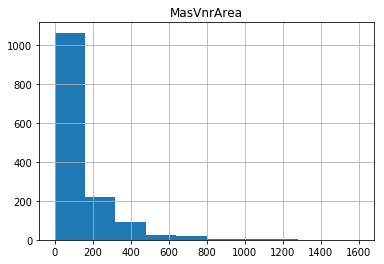

In [1006]:
data.hist(column=['MasVnrArea'])

We delete this column because of the same reasons as the previous one.

In [1007]:
data.drop(columns=['MasVnrArea'],inplace=True)

## ExterQual

Evaluates the quality of the material on the exterior. <br>
<br>
       Ex->Excellent<br>
       Gd->Good<br>
       TA->Average/Typical<br>
       Fa->Fair<br>
       Po->Poor<br>
<br>
Type: Categorical

In [1008]:
data['ExterQual'].isna().sum()

0

In [1009]:
data['ExterQual'].value_counts()

TA    893
Gd    482
Ex     49
Fa     14
Name: ExterQual, dtype: int64

## ExterCond

Evaluates the present condition of the material on the exterior. <br>
<br>
       Ex->Excellent<br>
       Gd->Good<br>
       TA->Average/Typical<br>
       Fa->Fair<br>
       Po->Poor<br>
<br>
Type: Categorical

In [1010]:
data['ExterCond'].isna().sum()

0

In [1011]:
data['ExterCond'].value_counts()

TA    1263
Gd     143
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [1012]:
len(data[(data['ExterCond'] == data['ExterQual'])])

803

## Foundation

Masonry Masonry veneer area in square feet. <br>
<br>
       BrkTil->Brick & Tile<br>
       CBlock->Cinder Block<br>
       PConc->Poured Contrete	<br>
       Slab->Slab<br>
       Stone->Stone<br>
       Wood->Wood<br>
<br>
Type: Categorical

In [1013]:
data['Foundation'].isna().sum()

0

In [1014]:
data['Foundation'].value_counts()

PConc     640
CBlock    620
BrkTil    145
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

## BsmtQual

Evaluates the height of the basement. <br>
<br>
       Ex->Excellent (100+ inches)<br>
       Gd->Good (90-99 inches)<br>
       TA->Typical (80-89 inches)<br>
       Fa->Fair (70-79 inches)<br>
       Po->Poor (<70 inches)<br>
       NA->No Basement<br>
<br>
Type: Categorical

In [1015]:
data['BsmtQual'].isna().sum()

37

In this case NA does not mean the value is missing, it means it makes no sense to evaluate it.

In [1016]:
data['BsmtQual'].value_counts()

TA    640
Gd    609
Ex    117
Fa     35
Name: BsmtQual, dtype: int64

In [1017]:
rename = 'NoBasement'
data.loc[data.BsmtQual.isna(), 'BsmtQual'] = rename
data['BsmtQual'].value_counts()

TA            640
Gd            609
Ex            117
NoBasement     37
Fa             35
Name: BsmtQual, dtype: int64

## BsmtCond

Evaluates the general condition of the basement.<br>
<br>
       Ex->Excellent<br>
       Gd->Good<br>
       TA->Typical - slight dampness allowed<br>
       Fa->Fair - dampness or some cracking or settling<br>
       Po->Poor - Severe cracking, settling, or wetness<br>
       NA->No Basement<br>
<br>
Type: Categorical

In [1018]:
data['BsmtCond'].isna().sum()

37

In [1019]:
data['BsmtCond'].value_counts()

TA    1291
Gd      63
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [1020]:
rename = 'NoBasement'
data.loc[data.BsmtCond.isna(), 'BsmtCond'] = rename
data['BsmtCond'].value_counts()

TA            1291
Gd              63
Fa              45
NoBasement      37
Po               2
Name: BsmtCond, dtype: int64

## BsmtExposure

Refers to walkout or garden level walls.<br>
<br>
       Gd->Good Exposure<br>
       Av->Average Exposure (split levels or foyers typically score average or above)<br>	
       Mn->Mimimum Exposure<br>
       No->No Exposure<br>
       NA->No Basement<br>
<br>
Type: Categorical

In [1021]:
data['BsmtExposure'].isna().sum()

38

In [1022]:
data['BsmtExposure'].value_counts()

No    950
Av    217
Gd    120
Mn    113
Name: BsmtExposure, dtype: int64

In [1023]:
rename = 'NoBasement'
data.loc[data.BsmtExposure.isna(), 'BsmtExposure'] = rename
data['BsmtExposure'].value_counts()

No            950
Av            217
Gd            120
Mn            113
NoBasement     38
Name: BsmtExposure, dtype: int64

## BsmtFinType1

Rating of basement finished area.<br>
<br>
       GLQ->Good Living Quarters<br>
       ALQ->Average Living Quarters<br>
       BLQ->Below Average Living Quarters<br>	
       Rec->Average Rec Room<br>
       LwQ->Low Quality<br>
       Unf->Unfinshed<br>
       NA->No Basement<br>
<br>
Type: Categorical

In [1024]:
data['BsmtFinType1'].isna().sum()

37

In [1025]:
data['BsmtFinType1'].value_counts()

Unf    429
GLQ    411
ALQ    216
BLQ    144
Rec    128
LwQ     73
Name: BsmtFinType1, dtype: int64

In [1026]:
data.drop(columns=['BsmtFinType1'],inplace=True)

## BsmtFinSF1

Type 1 finished square feet.<br>
Type: Categorical

In [1027]:
data['BsmtFinSF1'].isna().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D8EF547B8>]],
      dtype=object)

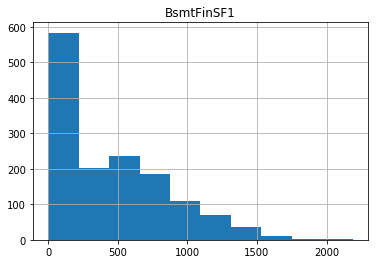

In [1028]:
data.hist(column=['BsmtFinSF1'])

In [1029]:
data.drop(columns=['BsmtFinSF1'],inplace=True)

## BsmtFinType2

Rating of basement finished area (if multiple types).<br>
<br>
       GLQ->Good Living Quarters<br>
       ALQ->Average Living Quarters<br>
       BLQ->Below Average Living Quarters	<br>
       Rec->Average Rec Room<br>
       LwQ->Low Quality<br>
       Unf->Unfinshed<br>
       NA->No Basement<br>
<br>
Type: Categorical

In [1030]:
data['BsmtFinType2'].isna().sum()

38

In [1031]:
data['BsmtFinType2'].value_counts()

Unf    1239
Rec      51
LwQ      46
BLQ      32
ALQ      19
GLQ      13
Name: BsmtFinType2, dtype: int64

In [1032]:
data.drop(columns=['BsmtFinType2'],inplace=True)

## BsmtFinSF2

Type 2 finished square feet.<br>

Type: Numerical

In [1033]:
data['BsmtFinSF2'].isna().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D90C11C88>]],
      dtype=object)

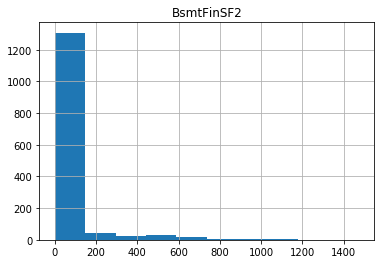

In [1034]:
data.hist(column=['BsmtFinSF2'])

In [1035]:
data.drop(columns=['BsmtFinSF2'],inplace=True)

## BsmtUnfSF

Unfinished square feet of basement area<br>
Type: Numerical

In [1036]:
data['BsmtUnfSF'].isna().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D90C560F0>]],
      dtype=object)

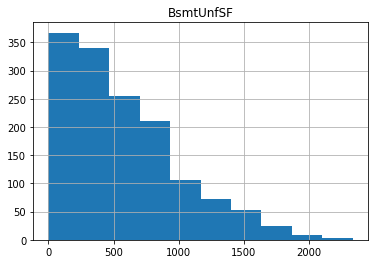

In [1037]:
data.hist(column=['BsmtUnfSF'])

In [1038]:
data.drop(columns=['BsmtUnfSF'],inplace=True)

## TotalBsmtSF

Total square feet of basement area<br>
Type: Numerical

In [1039]:
data['TotalBsmtSF'].isna().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D90D0B240>]],
      dtype=object)

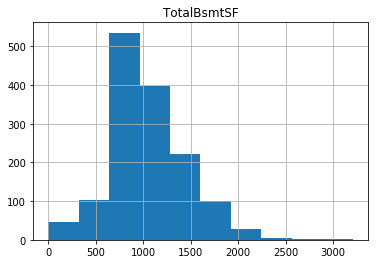

In [1040]:
data.hist(column=['TotalBsmtSF'])

In [1041]:
mean = data.TotalBsmtSF.mean()
data.loc[data.TotalBsmtSF.isna(), 'TotalBsmtSF'] = mean
data['TotalBsmtSF'].isna().sum()

0

We will delete BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF because this columns do not give important information about our data.

## Heating

Type of heating.<br>
<br>
       Floor->Floor Furnace<br>
       GasA->Gas forced warm air furnace<br>
       GasW->Gas hot water or steam heat<br>
       Grav->Gravity furnace<br>	
       OthW->Hot water or steam heat other than gas<br>
       Wall->Wall furnace<br>
<br>       
Type: Categorical

In [1042]:
data['Heating'].isna().sum()

0

In [1043]:
data['Heating'].value_counts()

GasA     1407
GasW       17
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [1044]:
data.drop(columns=['Heating'],inplace=True)

## HeatingQC

Heating quality and condition.<br>
<br>
       Ex->Excellent<br>
       Gd->Good<br>
       TA->Average/Typical<br>
       Fa->Fair<br>
       Po->Poor<br>
<br>       
Type: Categorical

In [1045]:
data['HeatingQC'].isna().sum()

0

In [1046]:
data['HeatingQC'].value_counts()

Ex    731
TA    421
Gd    238
Fa     47
Po      1
Name: HeatingQC, dtype: int64

## CentralAir

Central air conditioning.<br>
<br>
       N->No
       Y->Yes
<br>
Type: Binary		

In [1047]:
data['CentralAir'].isna().sum()

0

In [1048]:
data['CentralAir'].value_counts()

Y    1344
N      94
Name: CentralAir, dtype: int64

We change the values to boolean ones.

In [1049]:
data.loc[data.CentralAir == 'Y', 'CentralAir'] = True
data.loc[data.CentralAir == 'N', 'CentralAir'] = False

In [1050]:
data['CentralAir'].value_counts()

True     1344
False      94
Name: CentralAir, dtype: int64

## Electrical

Electrical system.<br>
<br>
       SBrkr->Standard Circuit Breakers & Romex<br>
       FuseA->Fuse Box over 60 AMP and all Romex wiring (Average)<br>	
       FuseF->60 AMP Fuse Box and mostly Romex wiring (Fair)<br>
       FuseP->60 AMP Fuse Box and mostly knob & tube wiring (poor)<br>
       Mix->Mixed<br>
<br>       
Type: Categorical

In [1051]:
data['Electrical'].isna().sum()

1

In [1052]:
data['Electrical'].value_counts()

SBrkr    1312
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

We will delete this column because if does not hold relevant information.

In [1053]:
data.drop(columns=['Electrical'],inplace=True)

## 1stFlrSF

First Floor square feet.<br>
Type: Numerical

In [1054]:
data['1stFlrSF'].isna().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D90A38390>]],
      dtype=object)

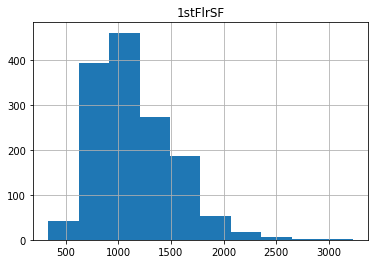

In [1055]:
data.hist(column=['1stFlrSF'])

## 2ndFlrSF

Second floor square feet.<br>
Type: Numerical

In [1056]:
data['2ndFlrSF'].isna().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D90DF13C8>]],
      dtype=object)

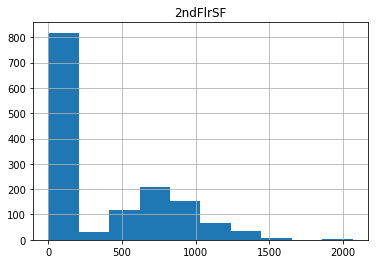

In [1057]:
data.hist(column=['2ndFlrSF'])

We will create a binary variable that states if the house has more than one floor and we will delete the columns 1stFlrSF, 2ndFlrSFbecause the information is already in GrLivArea.

In [1058]:
data['SecondFloor'] = data.apply(lambda row: row['2ndFlrSF']>0 , axis=1)
data['SecondFloor'].value_counts()

False    816
True     622
Name: SecondFloor, dtype: int64

## LowQualFinSF

Low quality finished square feet (all floors).<br>
Type: Numerical

In [1059]:
data['LowQualFinSF'].isna().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D90E70160>]],
      dtype=object)

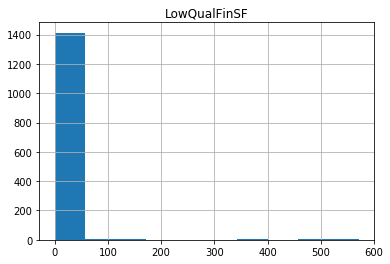

In [1060]:
data.hist(column=['LowQualFinSF'])

Nearly all instances have the same value so not many information can be extracted, we will delete this column.

In [1061]:
data.drop(columns=['LowQualFinSF'],inplace=True)
data.drop(columns=['1stFlrSF'],inplace=True)
data.drop(columns=['2ndFlrSF'],inplace=True)

## GrLivArea

Above grade (ground) living area square feet.<br>
Type: Numerical

In [1062]:
data['GrLivArea'].isna().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D90EB1AC8>]],
      dtype=object)

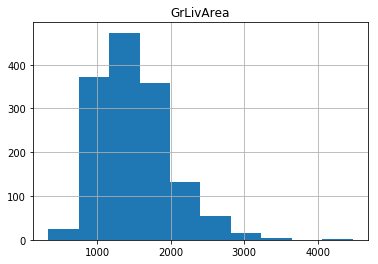

In [1063]:
data.hist(column=['GrLivArea'])

## BsmtFullBath

Basement full bathrooms.<br>
Type: Numerical

In [1064]:
data['BsmtFullBath'].isna().sum()

0

In [1065]:
data['BsmtFullBath'].value_counts()

0    853
1    573
2     11
3      1
Name: BsmtFullBath, dtype: int64

We put the 2 NA values with the mode value.

In [1066]:
mode = 0
data.loc[data.BsmtFullBath.isna(), 'BsmtFullBath'] = mode
data['BsmtFullBath'].value_counts()

0    853
1    573
2     11
3      1
Name: BsmtFullBath, dtype: int64

## BsmtHalfBath

Basement half bathrooms.<br>
Type: Numerical

In [1067]:
data['BsmtHalfBath'].isna().sum()

0

In [1068]:
data['BsmtHalfBath'].value_counts()

0    1358
1      78
2       2
Name: BsmtHalfBath, dtype: int64

In [1069]:
mode = 0.0
data.loc[data.BsmtHalfBath.isna(), 'BsmtHalfBath'] = mode
data['BsmtHalfBath'].value_counts()

0.0    1358
1.0      78
2.0       2
Name: BsmtHalfBath, dtype: int64

## FullBath

Full bathrooms above grade.<br>
Type: Numerical

In [1070]:
data['FullBath'].isna().sum()

0

In [1071]:
data['FullBath'].value_counts()

2    759
1    643
3     28
0      8
Name: FullBath, dtype: int64

## HalfBath

Half baths above grade.<br>
Type: Numerical

In [1072]:
data['HalfBath'].isna().sum()

0

In [1073]:
data['HalfBath'].value_counts()

0    899
1    527
2     12
Name: HalfBath, dtype: int64

We will create a variable will tells us the number of bathrooms that the house has in order to simplify the dataset.

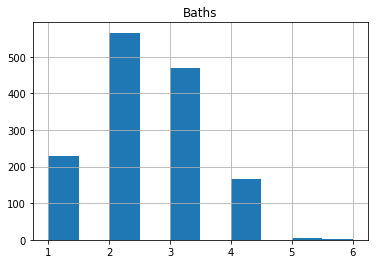

In [1074]:
data['Baths'] = data.apply(lambda row: row['HalfBath'] + row['FullBath'] + row['BsmtHalfBath'] + row['BsmtFullBath'], axis=1)
data.hist(column=['Baths'])
data.drop(columns=['HalfBath'],inplace=True)
data.drop(columns=['FullBath'],inplace=True)
data.drop(columns=['BsmtHalfBath'],inplace=True)
data.drop(columns=['BsmtFullBath'],inplace=True)

## BedroomAbvGr

Bedrooms above grade (does NOT include basement bedrooms).<br>
Type: Numerical

In [1075]:
data['BedroomAbvGr'].isna().sum()

0

3    794
2    354
4    207
1     50
5     20
6      7
0      5
8      1
Name: BedroomAbvGr, dtype: int64

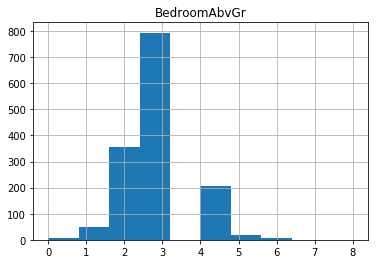

In [1076]:
data.hist(column=['BedroomAbvGr'])
data['BedroomAbvGr'].value_counts()

## KitchenAbvGr

Kitchens above grade.<br>
Type: Numerical

In [1077]:
data['KitchenAbvGr'].isna().sum()

0

1    1371
2      64
3       2
0       1
Name: KitchenAbvGr, dtype: int64

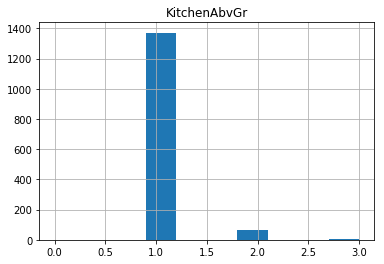

In [1078]:
data.hist(column=['KitchenAbvGr'])
data['KitchenAbvGr'].value_counts()

## KitchenQual

Kitchen quality<br>
<br>
       Ex->Excellent<br>
       Gd->Good<br>
       TA->Typical/Average<br>
       Fa->Fair<br>
       Po->Poor<br>
<br>
Type: Categorical

In [1079]:
data['KitchenQual'].isna().sum()

0

In [1080]:
data['KitchenQual'].value_counts()

TA    724
Gd    578
Ex     97
Fa     39
Name: KitchenQual, dtype: int64

We will put the NA as the mode's value.

In [1081]:
mode = 'TA'
data.loc[data.KitchenQual.isna(), 'KitchenQual'] = mode
data['KitchenQual'].value_counts()

TA    724
Gd    578
Ex     97
Fa     39
Name: KitchenQual, dtype: int64

## TotRmsAbvGrd

Total rooms above grade (does not include bathrooms).<br>
Type: Numerical

In [1082]:
data['TotRmsAbvGrd'].isna().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D92074518>]],
      dtype=object)

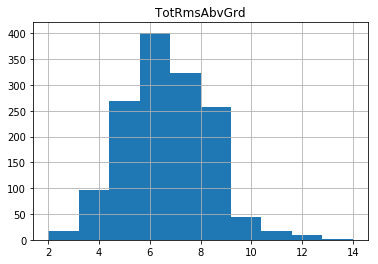

In [1083]:
data.hist(column=['TotRmsAbvGrd'])

## Functional

Home functionality (Assume typical unless deductions are warranted).<br>
<br>
       Typ->Typical Functionality<br>
       Min1->Minor Deductions 1<br>
       Min2->Minor Deductions 2<br>
       Mod->Moderate Deductions<br>
       Maj1->Major Deductions 1<br>
       Maj2->Major Deductions 2<br>
       Sev->Severely Damaged<br>
       Sal->Salvage only<br>
<br>		
Type: Categorical

In [1084]:
data['Functional'].isna().sum()

0

In [1085]:
data['Functional'].value_counts()

Typ     1343
Min2      34
Min1      29
Mod       13
Maj1      13
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [1086]:
mode = 'Typ'
data.loc[data.Functional.isna(), 'Functional'] = mode
data['Functional'].value_counts()

Typ     1343
Min2      34
Min1      29
Mod       13
Maj1      13
Maj2       5
Sev        1
Name: Functional, dtype: int64

## Fireplaces

Number of fireplaces.<br>
Type: Numerical

In [1087]:
data['Fireplaces'].isna().sum()

0

In [1088]:
data['Fireplaces'].value_counts()

0    688
1    643
2    103
3      4
Name: Fireplaces, dtype: int64

## FireplaceQu

Fireplace quality.<br>
<br>
       Ex->Excellent - Exceptional Masonry Fireplace<br>
       Gd->Good - Masonry Fireplace in main level<br>
       TA->Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement<br>
       Fa->Fair - Prefabricated Fireplace in basement<br>
       Po->Poor - Ben Franklin Stove<br>
       NA->No Fireplace<br>
<br>       
Type: Categorical

In [1089]:
data['FireplaceQu'].isna().sum()

688

In [1090]:
data['FireplaceQu'].value_counts()

Gd    371
TA    303
Fa     32
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [1091]:
rename = 'NoFireplace'
data.loc[data.FireplaceQu.isna(), 'FireplaceQu'] = rename
data['FireplaceQu'].value_counts()

NoFireplace    688
Gd             371
TA             303
Fa              32
Ex              24
Po              20
Name: FireplaceQu, dtype: int64

## GarageType

Garage location.<br>
<br>
       2Types->More than one type of garage<br>
       Attchd->Attached to home<br>
       Basment->Basement Garage<br>
       BuiltIn->Built-In (Garage part of house - typically has room above garage)<br>
       CarPort->Car Port<br>
       Detchd->Detached from home<br>
       NA->No Garage<br>
<br>		
Type: Categorical

In [1092]:
data['GarageType'].isna().sum()

81

In [1093]:
data['GarageType'].value_counts()

Attchd     854
Detchd     385
BuiltIn     86
Basment     19
CarPort      9
2Types       4
Name: GarageType, dtype: int64

We will rename the NA in order to properly state the valid No Garage category.

In [1094]:
rename = 'NoGarage'
data.loc[data.GarageType.isna(), 'GarageType'] = rename
data['GarageType'].value_counts()

Attchd      854
Detchd      385
BuiltIn      86
NoGarage     81
Basment      19
CarPort       9
2Types        4
Name: GarageType, dtype: int64

## GarageYrBlt

Year garage was built.<br>
Type: Numerical

In [1095]:
data['GarageYrBlt'].isna().sum()

81

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D92148240>]],
      dtype=object)

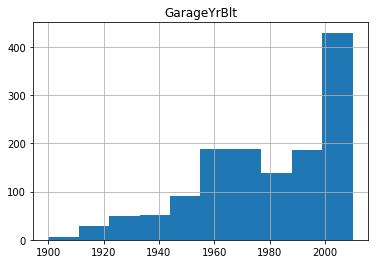

In [1096]:
data.hist(column=['GarageYrBlt'])

We will delete this column because the big correlation between this variable and the year the house was built.

In [1097]:
data.drop(columns=['GarageYrBlt'],inplace=True)

## GarageFinish

Interior finish of the garage.<br>
<br>
       Fin->Finished<br>
       RFn->Rough Finished<br>	
       Unf->Unfinished<br>
       NA->No Garage<br>
<br>		
Type: Categorical

In [1098]:
data['GarageFinish'].isna().sum()

81

In [1099]:
data['GarageFinish'].value_counts()

Unf    599
RFn    418
Fin    340
Name: GarageFinish, dtype: int64

We will rename the NA in order to properly state the valid No Garage category.

In [1100]:
rename = 'NoGarage'
data.loc[data.GarageFinish.isna(), 'GarageFinish'] = rename
data['GarageFinish'].value_counts()

Unf         599
RFn         418
Fin         340
NoGarage     81
Name: GarageFinish, dtype: int64

## GarageCars

Size of garage in car capacity.<br>
Type: Numerical

In [1101]:
data['GarageCars'].isna().sum()

0

In [1102]:
data['GarageCars'].value_counts()

2    809
1    369
3    175
0     81
4      4
Name: GarageCars, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D92106C88>]],
      dtype=object)

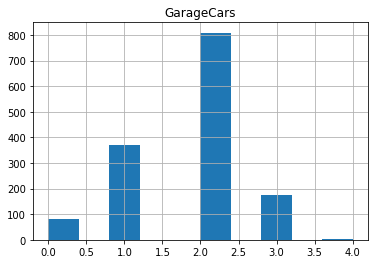

In [1103]:
data.hist(column=['GarageCars'])

We will change the NA value to the mode.

In [1104]:
mode = 2.0
data.loc[data.GarageCars.isna(), 'GarageCars'] = mode
data['GarageCars'].value_counts()

2.0    809
1.0    369
3.0    175
0.0     81
4.0      4
Name: GarageCars, dtype: int64

We will delete this column because we can extract the same information from GarageArea and we have seen a strong correlation between these 2 variables.

In [1105]:
data.drop(columns=['GarageCars'],inplace=True)

## GarageArea

Size of garage in square feet.<br>
Type: Numerical

In [1106]:
data['GarageArea'].isna().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D9222E048>]],
      dtype=object)

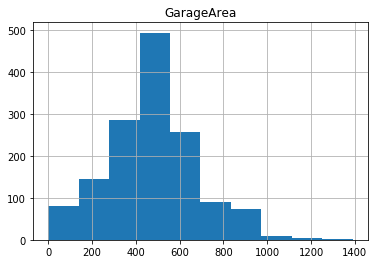

In [1107]:
data.hist(column=['GarageArea'])

We will change the NA value to the mean.

In [1108]:
mean = data.GarageArea.mean()
data.loc[data.GarageArea.isna(), 'GarageArea'] = mean
data['GarageArea'].isna().sum()

0

## GarageQual

Garage quality.<br>
<br>
       Ex->Excellent<br>
       Gd->Good<br>
       TA->Typical/Average<br>
       Fa->Fair<br>
       Po->Poor<br>
       NA->No Garage<br>
<br>		
Type: Categorical

In [1109]:
data['GarageQual'].isna().sum()

81

In [1110]:
data['GarageQual'].value_counts()

TA    1290
Fa      47
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

We will rename the NA in order to properly state the valid No Garage category.

In [1111]:
rename = 'NoGarage'
data.loc[data.GarageQual.isna(), 'GarageQual'] = rename
data['GarageQual'].value_counts()

TA          1290
NoGarage      81
Fa            47
Gd            14
Ex             3
Po             3
Name: GarageQual, dtype: int64

## GarageCond

Garage condition.<br>
<br>
       Ex->Excellent<br>
       Gd->Good<br>
       TA->Typical/Average<br>
       Fa->Fair<br>
       Po->Poor<br>
       NA->No Garage<br>
<br>		
Type: Categorical

In [1112]:
data['GarageCond'].isna().sum()

81

In [1113]:
data['GarageCond'].value_counts()

TA    1304
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

We will rename the NA in order to properly state the valid No Garage category.

In [1114]:
rename = 'NoGarage'
data.loc[data.GarageCond.isna(), 'GarageCond'] = rename
data['GarageCond'].value_counts()

TA          1304
NoGarage      81
Fa            35
Gd             9
Po             7
Ex             2
Name: GarageCond, dtype: int64

## PavedDrive

Paved driveway.<br>
<br>
       Y->Paved<br> 
       P->Partial Pavement<br>
       N->Dirt/Gravel<br>
<br>       
Type: Categorical

In [1115]:
data['PavedDrive'].isna().sum()

0

In [1116]:
data['PavedDrive'].value_counts()

Y    1321
N      88
P      29
Name: PavedDrive, dtype: int64

## WoodDeckSF

Wood deck area in square feet.<br>

Type: Numerical

In [1117]:
data['WoodDeckSF'].isna().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D922E72E8>]],
      dtype=object)

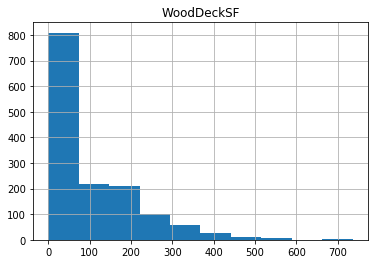

In [1118]:
data.hist(column=['WoodDeckSF'])

## OpenPorchSF

Open porch area in square feet.<br>

Type: Numerical

In [1119]:
data['OpenPorchSF'].isna().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D92343A90>]],
      dtype=object)

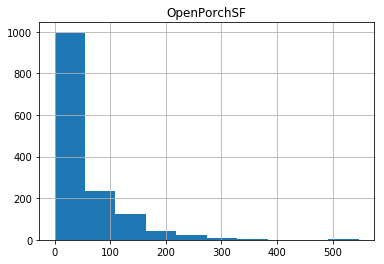

In [1120]:
data.hist(column=['OpenPorchSF'])

## EnclosedPorch

Enclosed porch area in square feet.<br>
	
Type: Numerical

In [1121]:
data['EnclosedPorch'].isna().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D923A64E0>]],
      dtype=object)

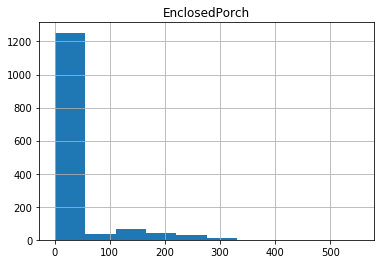

In [1122]:
data.hist(column=['EnclosedPorch'])

## 3SsnPorch

Three season porch area in square feet.<br>

Type: Numerical

In [1123]:
data['3SsnPorch'].isna().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D922D0C88>]],
      dtype=object)

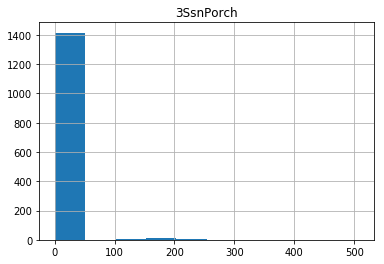

In [1124]:
data.hist(column=['3SsnPorch'])

## ScreenPorch

Screen porch area in square feet.<br>

Type: Numerical

In [1125]:
data['ScreenPorch'].isna().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D922D0208>]],
      dtype=object)

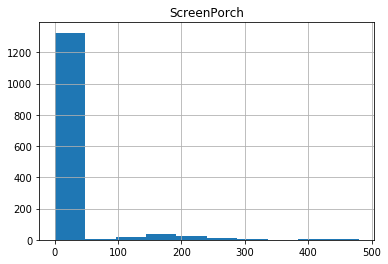

In [1126]:
data.hist(column=['ScreenPorch'])

We will create a column which tells us if the house has a porch or not and we will delete all the columns that refer to it.

In [1127]:
data['Porch'] = data.apply(lambda row: row['WoodDeckSF']!=0 or row['OpenPorchSF']!=0 or row['EnclosedPorch']!=0 or row['3SsnPorch']!=0 or row['ScreenPorch']!=0, axis=1)
data['Porch'].value_counts()

True     1185
False     253
Name: Porch, dtype: int64

In [1128]:
data.drop(columns=['ScreenPorch'],inplace=True)
data.drop(columns=['3SsnPorch'],inplace=True)
data.drop(columns=['EnclosedPorch'],inplace=True)
data.drop(columns=['OpenPorchSF'],inplace=True)
data.drop(columns=['WoodDeckSF'],inplace=True)

## PoolArea

Pool area in square feet.<br>

Type: Numerical

In [1129]:
data['PoolArea'].isna().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D924D4F60>]],
      dtype=object)

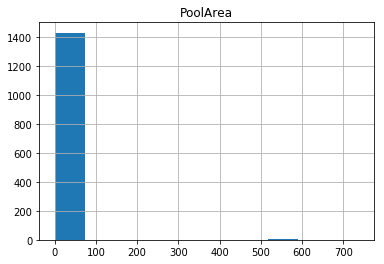

In [1130]:
data.hist(column=['PoolArea'])

## PoolQC

Pool quality.<br>
<br>		
       Ex->Excellent<br>
       Gd->Good<br>
       TA->Average/Typical<br>
       Fa->Fair<br>
       NA->No Pool<br>
<br>
Type: Categorical

In [1131]:
data['PoolQC'].isna().sum()

1432

In [1132]:
data['PoolQC'].value_counts()

Gd    2
Ex    2
Fa    2
Name: PoolQC, dtype: int64

As we have seen, having a pool is not common enough for it to be a categorical variable. Instead we will make a binary one and drop these columns.

In [1133]:
data['Pool'] = data.apply(lambda row: row['PoolArea'] != 0.0 , axis=1)
data['Pool'].value_counts()

False    1432
True        6
Name: Pool, dtype: int64

In [1134]:
data.drop(columns=['PoolArea'],inplace=True)
data.drop(columns=['PoolQC'],inplace=True)

## Fence

Fence quality.<br>
<br>		
       GdPrv->Good Privacy<br>
       MnPrv->Minimum Privacy<br>
       GdWo->Good Wood<br>
       MnWw->Minimum Wood/Wire<br>
       NA->No Fence<br>
<br>
Type: Categorical

In [1135]:
data['Fence'].isna().sum()

1157

In [1136]:
data['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [1137]:
rename = 'NoFence'
data.loc[data.Fence.isna(), 'Fence'] = rename
data['Fence'] = data.apply(lambda row: row['Fence'] != 'NoFence' , axis=1)
data['Fence'].value_counts()

False    1157
True      281
Name: Fence, dtype: int64

## MiscFeature

Miscellaneous feature not covered in other categories.<br>
<br>		
       Elev->Elevator<br>
       Gar2->2nd Garage (if not described in garage section)<br>
       Othr->Other<br>
       Shed->Shed (over 100 SF)<br>
       TenC->Tennis Court<br>
       NA->None<br>
<br>
Type: Categorical

In [1138]:
data['MiscFeature'].isna().sum()

1386

In [1139]:
data['MiscFeature'].value_counts()

Shed    47
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

This variable adds very little information because most of the rows have the same value. We will drop it and keep the next one which tells us the moneraty value.

In [1140]:
data.drop(columns=['MiscFeature'],inplace=True)

## MiscVal

$Value of miscellaneous feature.<br>

Type: Numerical

In [1141]:
data['MiscVal'].isna().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D925588D0>]],
      dtype=object)

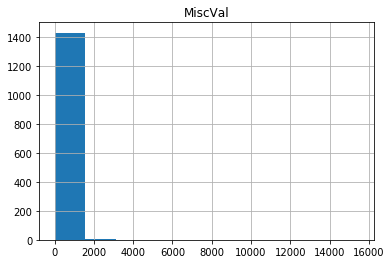

In [1142]:
data.hist(column=['MiscVal'])

## MoSold

Month Sold (MM).<br>

Type: Date

In [1143]:
data['MoSold'].isna().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D925AA080>]],
      dtype=object)

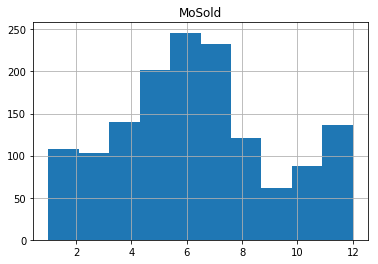

In [1144]:
data.hist(column=['MoSold'])

## YrSold

Year Sold (YYYY).<br>

Type: Date

In [1145]:
data['YrSold'].isna().sum()

0

In [1146]:
data['YrSold'].value_counts()

2009    336
2007    322
2006    309
2008    299
2010    172
Name: YrSold, dtype: int64

## SaleType

Type of sale.<br>
<br>		
       WD->	Warranty Deed - Conventional<br>
       CWD->Warranty Deed - Cash<br>
       VWD->Warranty Deed - VA Loan<br>
       New->Home just constructed and sold<br>
       COD->Court Officer Deed/Estate<br>
       Con->Contract 15% Down payment regular terms<br>
       ConLw->Contract Low Down payment and low interest<br>
       ConLI->Contract Low Interest<br>
       ConLD->Contract Low Down<br>
       Oth->Other<br>
<br>		
Type: Categorical

In [1147]:
data['SaleType'].isna().sum()

0

In [1148]:
data['SaleType'].value_counts()

WD       1247
New       120
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

As there is only 1 missing value we will change it to the mode.

In [1149]:
mode = 'WD'
data.loc[data.SaleType.isna(), 'SaleType'] = mode
data['SaleType'].value_counts()

WD       1247
New       120
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

## SaleCondition

Condition of sale<br>
<br>
       Normal->Normal Sale<br>
       Abnorml->Abnormal Sale -  trade, foreclosure, short sale<br>
       AdjLand->Adjoining Land Purchase<br>
       Alloca->Allocation - two linked properties with separate deeds, typically condo with a garage unit<br>	
       Family->Sale between family members<br>
       Partial->Home was not completed when last assessed (associated with New Homes)<br>
<br>
Type: Categorical

In [1150]:
data['SaleCondition'].isna().sum()

0

In [1151]:
data['SaleCondition'].value_counts()

Normal     1179
Partial     123
Abnorml     101
Family       20
Alloca       11
AdjLand       4
Name: SaleCondition, dtype: int64

# Save preprocessed dataset

In [1152]:
data.to_csv('../datasets/preprocessed/train.csv', index = None, header=True)
#data[1461:].to_csv('../datasets/preprocessed/test.csv', index = None, header=True)